# 07. bonniema/salary-predictor

## Exploratory Data Analysis - salary_final_done.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('07_salary_final_done.csv')
df.drop(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)

In [3]:
# First 5 rows of the dataset
df.head()

,Title,Company,Link,Review,Salary,Description,Location2,Rate_by,low,high,...,Rank,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,combined_text,Salary_Bins
0,"2021048 Data Scientist $215,000.00",B4CORP,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,None,"Up to $215,000 a year",Position Requires a Top Secret (TS/SCI) Cleara...,"Arlington, VA",Yearly,"Up to $215,000 a year",NaN,...,36.0,"Arlington, VA",80.159143,58.838571,69.961143,76.886286,78.608571,115.594571,"2021048 Data Scientist $215,000.00 Position Re...",5
1,Data Science/Data Analyst,CRAiC LLC,https://www.indeed.com/company/CRAiC-LLC/jobs/...,None,"$60,000 a year",Cost Readiness Analytics (CRAiC LLC) is lookin...,"Arlington, VA",Yearly,"$60,000 a year",NaN,...,36.0,"Arlington, VA",80.159143,58.838571,69.961143,76.886286,78.608571,115.594571,Data Science/Data Analyst Cost Readiness Analy...,1
2,Data Science Intern,MilliporeSigma,https://www.indeed.com/company/Serono/jobs/Dat...,3.9,$20 - $25 an hour,Job Title: Data Science Intern\rA career with ...,"Arlington, VA",Hourly,$20,$25 an hour,...,36.0,"Arlington, VA",80.159143,58.838571,69.961143,76.886286,78.608571,115.594571,Data Science Intern Job Title: Data Science In...,0
3,Jr. Data Scientist,Numero Data LLC,https://www.indeed.com/company/Numero-Data-LLC...,None,"$70,000 - $85,000 a year",Ideal candidate should have a degree in a quan...,"Arlington, VA",Yearly,"$70,000","$85,000 a year",...,36.0,"Arlington, VA",80.159143,58.838571,69.961143,76.886286,78.608571,115.594571,Jr. Data Scientist Ideal candidate should have...,2
4,Business Data Quality Engineer,HRU Technical Resources,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,None,$45 - $55 an hour,Please note that this is not a corp to corp or...,"Arlington, VA",Hourly,$45,$55 an hour,...,36.0,"Arlington, VA",80.159143,58.838571,69.961143,76.886286,78.608571,115.594571,Business Data Quality Engineer Please note tha...,3


In [4]:
# All columns, their counts and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Title                           963 non-null    object 
 1   Company                         963 non-null    object 
 2   Link                            963 non-null    object 
 3   Review                          963 non-null    object 
 4   Salary                          963 non-null    object 
 5   Description                     963 non-null    object 
 6   Location2                       958 non-null    object 
 7   Rate_by                         963 non-null    object 
 8   low                             963 non-null    object 
 9   high                            762 non-null    object 
 10  min                             963 non-null    float64
 11  max                             963 non-null    float64
 12  adjusted_salary                 963 

In [5]:
# Get statistical info about numerical columns
df.describe()

,min,max,adjusted_salary,adjusted_yearly_salary,Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Salary_Bins
count,963.000000,963.000000,963.000000,963.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,963.000000
mean,61670.441516,64296.993645,70584.627643,99319.570197,19.259798,81.594503,71.971462,76.992006,77.327358,81.964463,125.306669,2.424714
std,57509.344017,73286.336815,64832.741800,50092.871055,16.279706,8.871761,24.608875,15.811719,10.551968,9.333852,15.721412,1.629156
min,7.250000,0.000000,7.250000,10000.000000,1.000000,63.820000,35.860000,51.770000,56.680000,63.390000,100.000000,0.000000
25%,55.000000,25.000000,60.000000,62498.000000,7.000000,76.550000,49.420000,63.550000,71.230000,76.670000,112.820000,1.000000
50%,60000.000000,55200.000000,70000.000000,90000.000000,16.000000,80.159143,65.700000,74.800000,76.886286,79.980000,130.330000,2.000000
75%,95000.000000,113154.000000,112500.000000,126030.500000,30.000000,87.740000,83.340000,83.170000,86.440000,87.480000,135.900000,4.000000
max,300000.000000,500000.000000,362500.000000,362500.000000,74.000000,100.000000,115.580000,103.020000,100.000000,100.000000,155.300000,5.000000


In [6]:
# Example Row
print(df.iloc[1])
# df.loc[1, 'Description']
# df.loc[1, 'combined_text']

Title                                                     Data Science/Data Analyst
Company                                                                   CRAiC LLC
Link                              https://www.indeed.com/company/CRAiC-LLC/jobs/...
Review                                                                         None
Salary                                                               $60,000 a year
Description                       Cost Readiness Analytics (CRAiC LLC) is lookin...
Location2                                                             Arlington, VA
Rate_by                                                                      Yearly
low                                                                  $60,000 a year
high                                                                            NaN
min                                                                         60000.0
max                                                                         

## Column Analysis

In [7]:
print("#### EXAMPLE TITLES ####")
print(df['Title'].sample(20))

#### EXAMPLE TITLES ####
157                              Business System Analyst
851                            Digital Marketing Manager
903                                     Impact Assistant
172                   Senior Analyst - Digital Marketing
342                                   PURCHASING AGENT I
539    Business Intelligence Consultant for NYC Inves...
731                                        Data Engineer
297        Full Stack Data Engineer- SQL/Power BI/ETL/C#
7      Undergraduate Internship/Co-op Program - Data ...
603                                       Data Scientist
405                                   Lead Data Engineer
381                          Insurance Solutions Analyst
273          Marketing Manager (healthcare tech startup)
96          Operations Research Analyst (Data Scientist)
411                                         Web Designer
171           Analyst/Senior Analyst, Advanced Analytics
104                                   Business Analyst 2
643   

In [8]:
print("#### EXAMPLE COMPANIES ####")
print(df['Company'].sample(20))

#### EXAMPLE COMPANIES ####
731                                     Harnham
678                                 Robert Half
269                        Urban Village Church
796                         County of San Mateo
174                    Liberty Mutual Insurance
172                                     Harnham
702       United Way of the Columbia-Willamette
139                    Liberty Mutual Insurance
477                                       Jobot
55     American Academy of Physician Assistants
728                                   TardusInc
267                                   Darwin AI
214              Telemedicine - Male Excel, Inc
660                                 Robert Half
56                              Brevco Services
80                          Freedom Electronics
368                                    TIGHITCO
272                         NDL Industries Inc.
856                                       Jobot
158                                       Labby
Name: Compan

In [9]:
print("### EXAMPLE LINKS ####")
print(df['Link'].sample(20))

### EXAMPLE LINKS ####
590    https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
863    https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
479    https://www.indeed.com/company/Luxe-Developmen...
714    https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
487    https://www.indeed.com/company/SYNCFAB/jobs/Sa...
401    https://www.indeed.com/company/A-Brand-New-Day...
437    https://www.indeed.com/company/Icon-Media-Dire...
257    https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
642    https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
878    https://www.indeed.com/company/GeoJango-Maps/j...
177    https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
12     https://www.indeed.com/company/Blue-Orange-Dig...
374    https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
871    https://www.indeed.com/rc/clk?jk=43b33a93c0cac...
605    https://www.indeed.com/company/Open-Data-Scien...
531    https://www.indeed.com/company/DocuPet-Inc./jo...
67     https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
949    h

In [10]:
for i in range(5):
    rand_row = random.randint(0,len(df)-1)
    print(rand_row, '->', df.loc[rand_row]['Link'])

944 -> https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0D19kSVUiNzG2UWy1lRGehFMusHrHGUl8ru40ax50wmt1gcnJgB2R3fXjF8kQmuiM_mkSS9GrFs4-FfzqiXcT20gvOiAWbjgZcCQ6WXIXu42stfKab6UcjYxiXpy8GqptVzwRewsR1IOAPATcMJOKHzMaCfaa1r0oDXUfLwsc1ppZp2nSt5KP_vawAXvAPdo6g64Mxv2cKvM_PRRS7DLIjUIqBiF57CYBwb2F3KzzZF0Z98nCIJvgvE-VTCllowiKBaCReGsqGODwdVWncwY7h_oPu6cbWFJkFiUJq202VI0m6kUDazKuYxAXnH1-JFqfjU8zi_2Xk0souXAo4vLZFmoxDXo_-jCQodP3rJ1mVUfQVQfQ1hIhxpk5ZWdNUt6oHLCwYLe0oi0751HmzPDscc7WhLNaP4buDKzBk0YHW4BN9dTJhvEBjYH9AbeLGosWqIEGe2l7spRHNbznVRU5L0rA_IKLfioHLThj54mNTyiHzAaKpZ8TIQ5rAJqoekU9yv9ZiIbJyZEwT8vACjozt1GLooTEcEtXynhmoV5qxK9YCapCcQV6jp9LKJBcPBjC1ly3eH0Rr7zsCzuBvoyrmMwiBWWMaWmte0DNLycad7PLXkc7ASSY1t_oGgSFfy3fjT8SHC6XPHPo98EnS61afaX5AZs1qU_-GUie7w7jhuN9pIhmJbS-Txra_w2rilbnKPrmM1aC1kT2t9xeRBPydbr1ysT4OUceEjLY2Rq1bpBtRUjjgaWRZDXBQiLqZfCJVJhPl9Pa8VFjbWzBAGCtHhjAKXrFEMtXrgKK9FdJlRIErbaX53rZAEqJm2GraBSHvT0M64soTd3pPbqgrLCQIV35FlEfcrow8XHLurMP1jxiSBQ19SPvZU2vfhpjpkSEA=&p=1&fvj=0&vjs=3
751 -> https://www.indeed.

In [11]:
df['Review'].unique()
print(df[df['Review'] == 'None'].count()[0], "reviews were registered as 'None'")

479 reviews were registered as 'None'


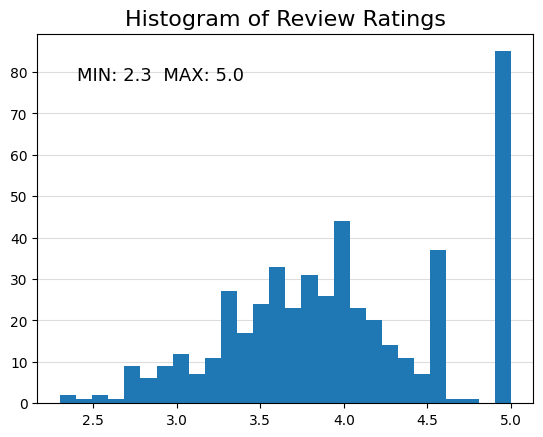

In [12]:
all_reviews = np.array(df[df['Review'] != 'None']['Review'], dtype=float)
plt.hist(all_reviews, bins=28, zorder=2)
plt.title("Histogram of Review Ratings", fontsize=16)
plt.text(2.4, 78, "MIN: {:.1f}  MAX: {:.1f}".format(all_reviews.min(), all_reviews.max()), fontsize=13)
plt.grid(color="#dddddd", axis='y', zorder=1)
plt.show()

In [13]:
print("#### EXAMPLE SALARY RANGES ####")
print(df['Salary'].sample(20))

#### EXAMPLE SALARY RANGES ####
80       $40,000 - $50,000 a year
697      $60,000 - $70,000 a year
463    $150,000 - $200,000 a year
230      $65,000 - $75,000 a year
122              From $12 an hour
404             $20 - $27 an hour
776             $37 - $45 an hour
539             $50 - $55 an hour
387       $28.31 - $36.80 an hour
116      $65,000 - $85,000 a year
725             $20 - $30 an hour
904     $90,000 - $115,000 a year
949             $45 - $50 an hour
214             $34 - $35 an hour
403               $145,000 a year
202    $119,900 - $176,700 a year
940             $30 - $60 an hour
302      $50,000 - $95,000 a year
937    $153,300 - $201,600 a year
665     $97,360 - $126,571 a year
Name: Salary, dtype: object


In [14]:
print("#### 10 LONGEST DESCRIPTION LENGTHS ####")
print(df['Description'].apply(len).sort_values(ascending=False)[:10])
print("#### 10 SHORTEST DESCRIPTION LENGTHS ####")
print(df['Description'].apply(len).sort_values()[:10])

#### 10 LONGEST DESCRIPTION LENGTHS ####
351    23357
387    20177
691    19542
98     19178
665    18664
792    18337
462    18230
371    18143
871    17478
464    17434
Name: Description, dtype: int64
#### 10 SHORTEST DESCRIPTION LENGTHS ####
749     18
743     18
50      27
789     30
598    154
599    233
535    350
938    370
712    398
867    507
Name: Description, dtype: int64


In [15]:
print("749 ->", df.loc[749,'Description'])
print("743 ->", df.loc[743,'Description'])
print("50  ->", df.loc[50,'Description'])
print("789 ->", df.loc[789,'Description'])
df.loc[598,'Description']

749 -> LEAD DATA ENGINEER
743 -> LEAD DATA ENGINEER
50  -> Senior Salesforce Developer
789 -> NO C2C OR THIRD-PARTY RESUMES.


'. Strong python\rë\x88 Strong SQL (snowflake preferred)\rë\x88 API Management (build & consume APIs)\rJob Types: Full-time, Contract\rSalary: $41.00 to $51.00 /hour'

In [16]:
print("#### ALL AVAILABLE LOCATIONS ####")
print(df['Location2'].value_counts())
print("\n{} out of {} rows contain null values".format(df['Location2'].isnull().sum(), len(df)))

#### ALL AVAILABLE LOCATIONS ####
San Francisco, CA     128
Los Angeles, CA        96
New York, NY           77
Seattle, WA            67
Boston, MA             60
Charlotte, NC          56
Atlanta, GA            49
Hartford, CT           46
Portland, OR           45
Arlington, VA          45
San Jose, CA           41
Chicago, IL            40
Denver, CO             39
Philadelphia, PA       39
Austin, TX             39
Dallas, TX             21
Miami, FL              19
Palo Alto, CA          12
Cambridge, MA          12
Washington, DC         10
Houston, TX             8
Pittsburg, PA           4
Raleigh-Durham, NC      3
Irving, TX              1
San Antonio, TX         1
Name: Location2, dtype: int64

5 out of 963 rows contain null values


In [17]:
print("#### SALARY RATES ####")
print(df['Rate_by'].value_counts())

#### SALARY RATES ####
Yearly     637
Hourly     294
Monthly     31
Daily        1
Name: Rate_by, dtype: int64


In [18]:
print("#### LOW-HIGH-MIN-MAX & ADJUSTED SALARY EXAMPLES ####")
print(df[['low', 'high', 'min', 'max', 'adjusted_salary', 'adjusted_yearly_salary']].sample(20))
print("\n{} out of {} rows have no high salary values.".format(df['high'].isnull().sum(), len(df)))

#### LOW-HIGH-MIN-MAX & ADJUSTED SALARY EXAMPLES ####
                low              high       min       max  adjusted_salary  \
30             $50        $55 an hour      50.0      55.0             52.5   
766            $48        $50 an hour      48.0      50.0             49.0   
472        $85,000    $200,000 a year   85000.0  200000.0         142500.0   
560        $90,000    $110,000 a year   90000.0  110000.0         100000.0   
120  $85,000 a year               NaN   85000.0       0.0          85000.0   
934        $78,426     $82,347 a year   78426.0   82347.0          80386.5   
26         $40,000     $50,000 a year   40000.0   50000.0          45000.0   
552        $70,000     $90,000 a year   70000.0   90000.0          80000.0   
394            $25        $29 an hour      25.0      29.0             27.0   
419       $150,000    $200,000 a year  150000.0  200000.0         175000.0   
361        $75,000     $85,000 a year   75000.0   85000.0          80000.0   
928       

In [19]:
print("#### 10 HIGHEST YEARLY SALARIES ####")
print(df['adjusted_yearly_salary'].sort_values(ascending=False)[:10])
print("#### 10 LOWEST YEARLY SALARIES ####")
print(df['adjusted_yearly_salary'].sort_values()[:10])

#### 10 HIGHEST YEARLY SALARIES ####
895    362500.0
438    362500.0
99     350000.0
100    325000.0
738    300000.0
183    300000.0
203    300000.0
739    275000.0
760    250000.0
612    226720.0
Name: adjusted_yearly_salary, dtype: float64
#### 10 LOWEST YEARLY SALARIES ####
744    10000.0
602    10000.0
19     12000.0
242    14170.0
219    15080.0
264    20800.0
269    22607.0
217    22880.0
769    23000.0
671    23400.0
Name: adjusted_yearly_salary, dtype: float64


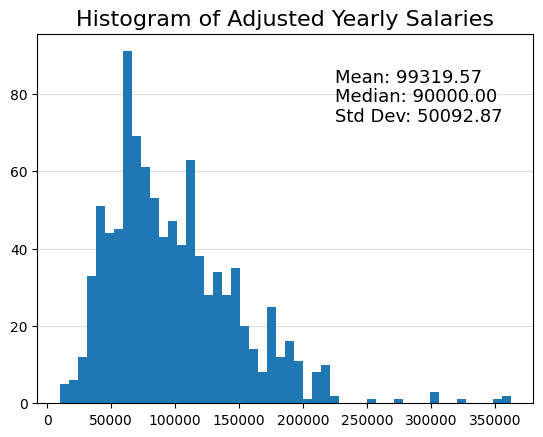

In [20]:
plt.hist(df['adjusted_yearly_salary'], bins=50, zorder=2)
plt.title("Histogram of Adjusted Yearly Salaries", fontsize=16)
plt.text(225000, 83, "Mean: {:.2f}".format(df['adjusted_yearly_salary'].mean()), fontsize=13)
plt.text(225000, 78, "Median: {:.2f}".format(df['adjusted_yearly_salary'].median()), fontsize=13)
plt.text(225000, 73, "Std Dev: {:.2f}".format(df['adjusted_yearly_salary'].std()), fontsize=13)
plt.grid(color='#dddddd', axis='y', zorder=1)
plt.show()

In [21]:
print("#### RANKS ####")
print(df['Rank'].value_counts())
print("\n{} out of {} rows have unpsecified ranks".format(df['Rank'].isnull().sum(), len(df)))

#### RANKS ####
2.0     128
22.0     96
1.0      77
9.0      67
10.0     60
37.0     56
30.0     49
17.0     45
36.0     45
16.0     41
13.0     40
34.0     39
15.0     39
56.0     39
55.0     21
3.0      12
11.0     12
7.0      10
68.0      8
33.0      4
48.0      3
74.0      1
66.0      1
Name: Rank, dtype: int64

70 out of 963 rows have unpsecified ranks


In [22]:
print("#### COUNTS OF ALL CITIES ####")
print(df['City'].value_counts())
# This is roughly the same as the counts of 'Location2' column
print("\n{} out of {} rows contain null values".format(df['City'].isnull().sum(), len(df)))

#### COUNTS OF ALL CITIES ####
San Francisco, CA     128
Los Angeles, CA        96
New York, NY           77
Seattle, WA            67
Boston, MA             60
Charlotte, NC          56
Atlanta, GA            49
Portland, OR           45
Arlington, VA          45
San Jose, CA           41
Chicago, IL            40
Denver, CO             39
Philadelphia, PA       39
Austin, TX             39
Dallas, TX             21
Palo Alto, CA          12
Cambridge, MA          12
Washington, DC         10
Houston, TX             8
Pittsburg, PA           4
Raleigh-Durham, NC      3
Irving, TX              1
San Antonio, TX         1
Name: City, dtype: int64

70 out of 963 rows contain null values


In [23]:
df[['Location2', 'City', 'Cost of Living Index', 'Rent Index', 'Cost of Living Plus Rent Index',
    'Groceries Index', 'Restaurant Price Index', 'Local Purchasing Power Index']].drop_duplicates().drop(50)

,Location2,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,"Arlington, VA","Arlington, VA",80.159143,58.838571,69.961143,76.886286,78.608571,115.594571
45,"Atlanta, GA","Atlanta, GA",73.890000,46.820000,60.940000,69.780000,69.780000,140.470000
95,"Austin, TX","Austin, TX",67.790000,52.040000,60.260000,63.850000,72.030000,145.760000
134,"Boston, MA","Boston, MA",82.880000,74.470000,78.860000,81.230000,81.850000,112.390000
194,"Cambridge, MA","Cambridge, MA",82.880000,74.470000,78.860000,81.230000,81.850000,112.390000
206,"Charlotte, NC","Charlotte, NC",72.400000,42.370000,58.040000,62.170000,79.730000,144.290000
262,"Chicago, IL","Chicago, IL",80.180000,58.640000,69.880000,76.470000,76.670000,113.520000
302,"Dallas, TX","Dallas, TX",68.030000,47.050000,58.000000,60.900000,70.470000,155.300000
323,"Denver, CO","Denver, CO",73.300000,51.980000,63.110000,65.060000,78.180000,130.330000
362,"Hartford, CT",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
print("#### 10 LONGEST COMBINED TEXTS (TITLE + DESCRIPTION) ####")
print(df['combined_text'].apply(len).sort_values(ascending=False)[:10])
print("#### 10 SHORTEST COMBINED TEXTS (TITLE + DESCRIPTION) ####")
print(df['combined_text'].apply(len).sort_values()[:10])

#### 10 LONGEST COMBINED TEXTS (TITLE + DESCRIPTION) ####
351    23381
387    20222
691    19568
98     19223
665    18728
792    18391
462    18294
371    18178
871    17542
464    17498
Name: combined_text, dtype: int64
#### 10 SHORTEST COMBINED TEXTS (TITLE + DESCRIPTION) ####
743     37
749     37
789     58
50      91
598    168
599    272
535    367
938    398
712    412
867    526
Name: combined_text, dtype: int64


In [25]:
print('743 ->', df.loc[743, 'combined_text'])
print('749 ->', df.loc[749, 'combined_text'])
print('789 ->', df.loc[789, 'combined_text'])
print('50  ->', df.loc[50, 'combined_text'])
df.loc[598, 'combined_text']

743 -> Lead Data Engineer LEAD DATA ENGINEER
749 -> LEAD DATA ENGINEER LEAD DATA ENGINEER
789 -> Electrical Business Analyst NO C2C OR THIRD-PARTY RESUMES.
50  -> Salesforce Developer with Einstein Analytics -(10+ Years)- R... Senior Salesforce Developer


'Data Engineer . Strong python\rë\x88 Strong SQL (snowflake preferred)\rë\x88 API Management (build & consume APIs)\rJob Types: Full-time, Contract\rSalary: $41.00 to $51.00 /hour'

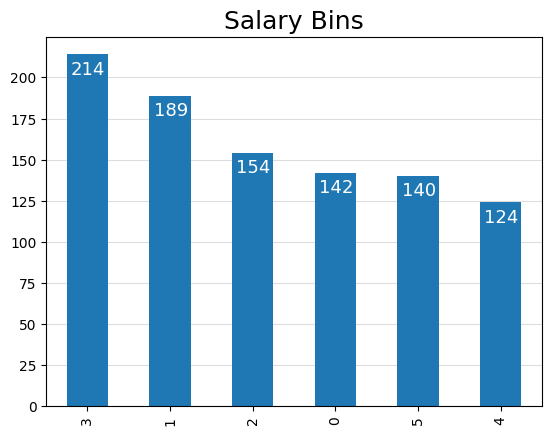

In [26]:
df['Salary_Bins'].value_counts().plot(kind='bar', zorder=2)
plt.title("Salary Bins", fontsize=18)
plt.grid(color='#dddddd', axis='y', zorder=1)
for i in range(6):
    plt.text(df['Salary_Bins'].value_counts().index[i]-0.2, df['Salary_Bins'].value_counts()[i]-12,
             df['Salary_Bins'].value_counts()[i], color='white', fontsize=13)
plt.show()

The salary bins were created w.r.t. `adjusted_yearly_salary` column, for the classification purpose of all 7 individual models used here.

The salary ranges for each bin were determined with the help of `quantile` method, by equally dividing the percentages into 7 pieces and rounding up/down appropriately:
* **0** --> 0 - 50000
* **1** --> 50000 - 70000
* **2** --> 70000 - 90000
* **3** --> 90000 - 120000
* **4** --> 120000 - 150000
* **5** --> 150000 - 400000

In [27]:
df['adjusted_yearly_salary'].quantile(list(np.linspace(0,1,7)))

0.000000     10000.000000
0.166667     54026.666667
0.333333     70000.000000
0.500000     90000.000000
0.666667    114400.000000
0.833333    145600.000000
1.000000    362500.000000
Name: adjusted_yearly_salary, dtype: float64